In [ ]:

from PIL import Image, ImageFilter
img = Image.open("input.jpg")
img_gray = img.convert("L").resize((256,256))
img_blur = img_gray.filter(ImageFilter.GaussianBlur(1.5))
img_blur.save("out_image.jpg")
img_blur.show()


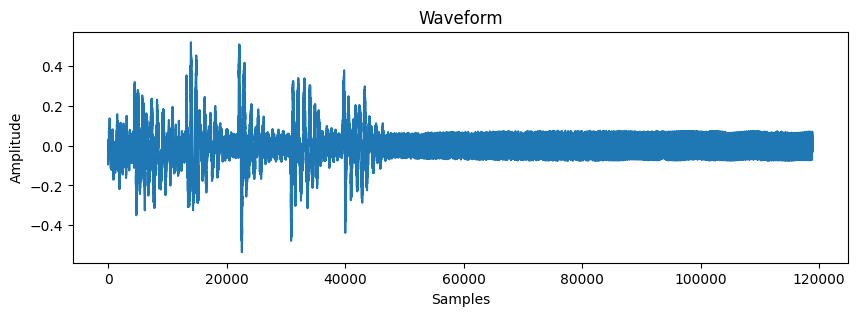

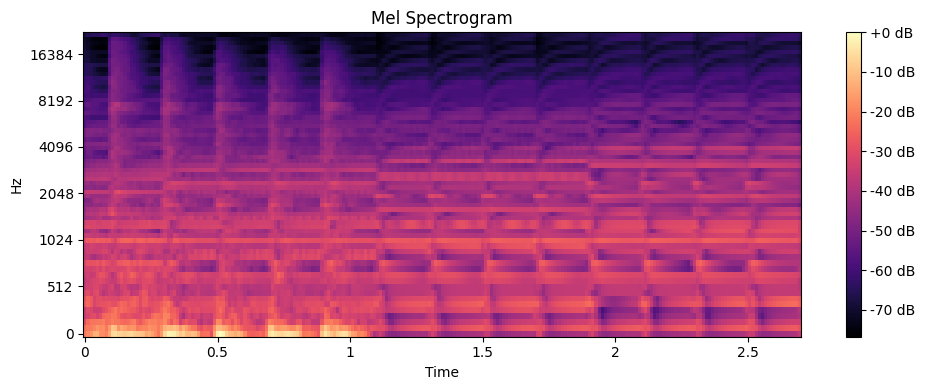

In [ ]:

import librosa
import librosa.display
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

y, sr = librosa.load("input.wav", sr=None)


y_trim = y[int(0.5 * sr): int(5.5 * sr)]


sf.write("out_audio_trim.wav", y_trim, sr)


plt.figure(figsize=(10, 3))
plt.plot(y_trim)
plt.title("Waveform")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

S = librosa.feature.melspectrogram(y=y_trim, sr=sr, n_mels=64)
S_dB = librosa.power_to_db(S, ref=np.max)


plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, y_axis='mel', x_axis='time')
plt.title("Mel Spectrogram")
plt.colorbar(format="%+2.0f dB")
plt.tight_layout()
plt.show()


In [ ]:

import cv2

cap = cv2.VideoCapture("input.mp4")
if not cap.isOpened():
    raise IOError("Cannot open input.mp4")


n = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS) or 25


mid = n // 2
cap.set(cv2.CAP_PROP_POS_FRAMES, mid)
ret, frame = cap.read()
if ret:
    frame_resized = cv2.resize(frame, (640, 360))
    cv2.imwrite("mid_frame.jpg", frame_resized)
else:
    raise IOError("Could not read middle frame")


cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter("out_video.mp4", fourcc, fps, (640, 360))

for i in range(int(fps * 3)):  # 3 seconds
    ok, f = cap.read()
    if not ok:
        break
    f_resized = cv2.resize(f, (640, 360))
    out.write(f_resized)

cap.release()
out.release()
print("✅ mid_frame.jpg and out_video.mp4 saved successfully.")


✅ mid_frame.jpg and out_video.mp4 saved successfully.
